In [ ]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/7 SEMESTRE/BLOQUE 2/RETO/GradientBoosted/viajes_universidades_por_hora_100km_final.csv')
df

,timestamp,universidad,comuna_origen,tipo_de_viaje,tipo_de_universidad,tiene_residencia,count,tamaño_uni,n_carreras
0,0,Campus Andrés Bello Uchile,Conchalí,0,0,1,1,45000,53
1,0,Campus Andrés Bello Uchile,Huechuraba,0,0,1,1,45000,53
2,0,Campus Andrés Bello Uchile,Lo Espejo,0,0,1,1,45000,53
3,0,Campus Andrés Bello Uchile,Providencia,0,0,1,7,45000,53
4,0,Campus Andrés Bello Uchile,Quilicura,0,0,1,1,45000,53
...,...,...,...,...,...,...,...,...,...
1823,23,UDP Facultad de economía y empresas,Colina,0,1,0,1,26400,14
1824,23,UDP Facultad de economía y empresas,Huechuraba,0,1,0,4,26400,14
1825,23,UDP Facultad de economía y empresas,Huechuraba,1,1,0,9,26400,14
1826,23,UDP Facultad de economía y empresas,Las Condes,0,1,0,1,26400,14


In [ ]:
#df = df[['timestamp','universidad','count']]
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
labels = 'count'

In [ ]:
def split_dataset(dataset, test_ratio=0.25):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio 
  return dataset[~test_indices], dataset[test_indices] 

In [ ]:
train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

1360 examples in training, 468 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='count',task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label = 'count',task=tfdf.keras.Task.REGRESSION)

In [ ]:
model = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION,num_trees=63, max_depth=13)

Use /tmp/tmpvk24yr2s as temporary training directory


In [ ]:
model.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:00.384075. Found 1360 examples.
Training model...
Model trained in 0:00:03.650146
Compiling model...
Model compiled.


In [ ]:
print(model.summary())

Model: "gradient_boosted_trees_model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: REGRESSION
Label: "__LABEL"

Input Features (8):
	comuna_origen
	n_carreras
	tamaño_uni
	tiene_residencia
	timestamp
	tipo_de_universidad
	tipo_de_viaje
	universidad

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.             "__LABEL"  9.170911 ################
    2.       "tipo_de_viaje"  8.490324 ##############
    3. "tipo_de_universidad"  8.232137 ##############
    4.         "tamaño_uni"  7.169146 ############
    5.          "n_carreras"  5.467107 #########
    6.         "universidad"  5.015765 ########
    7.    "tiene_residencia"  4.290964 ######
    8.           "timestamp"  3.689092 #####
    9.       "comuna_origen"  0.652439 

Vari

In [ ]:
model.compile(metrics=["mape"])
print(model.evaluate(test_ds))

1/1 [==============================] - 0s 189ms/step - loss: 0.0000e+00 - mape: 73.3145
[0.0, 73.31448364257812]


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0)

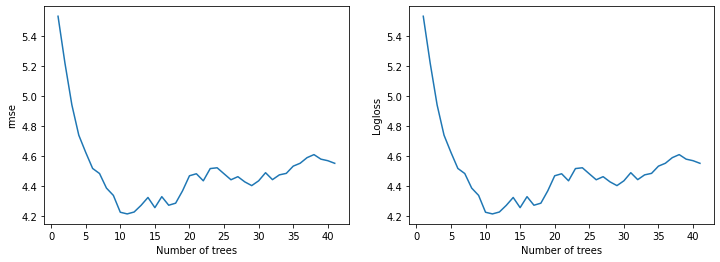

In [40]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()
#print(logs)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("rmse")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()